# 신용카드 연체 사용자 예측

# 0. 데이터 및 라이브러리 로드

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('creditcard_fault.csv')
df.drop('index', axis = 1, inplace = True)
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


# 1. 데이터 분석 및 전처리

### 수치형 데이터
- car, reality, child_num, income_total, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, work_phone, phone, email, family_size, begin_month, **credit**

### 범주형 데이터
- gender, income_type, edu_type, family_type, house_type, occyp_type

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [96]:
# occyp_type에서 결측치 처리
df['occyp_type'].fillna("N", inplace=True)
print("결측치 개수 :", df['occyp_type'].isnull().sum())

결측치 개수 : 0


## 종속 변수 (Credit)

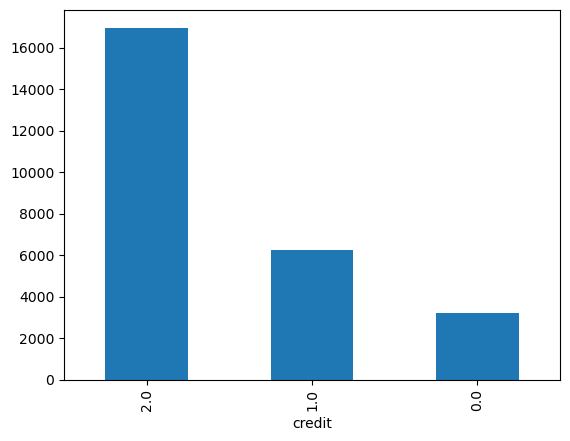

In [97]:
df['credit'].value_counts().plot(kind='bar')
plt.show()

## 수치형 변수 plot

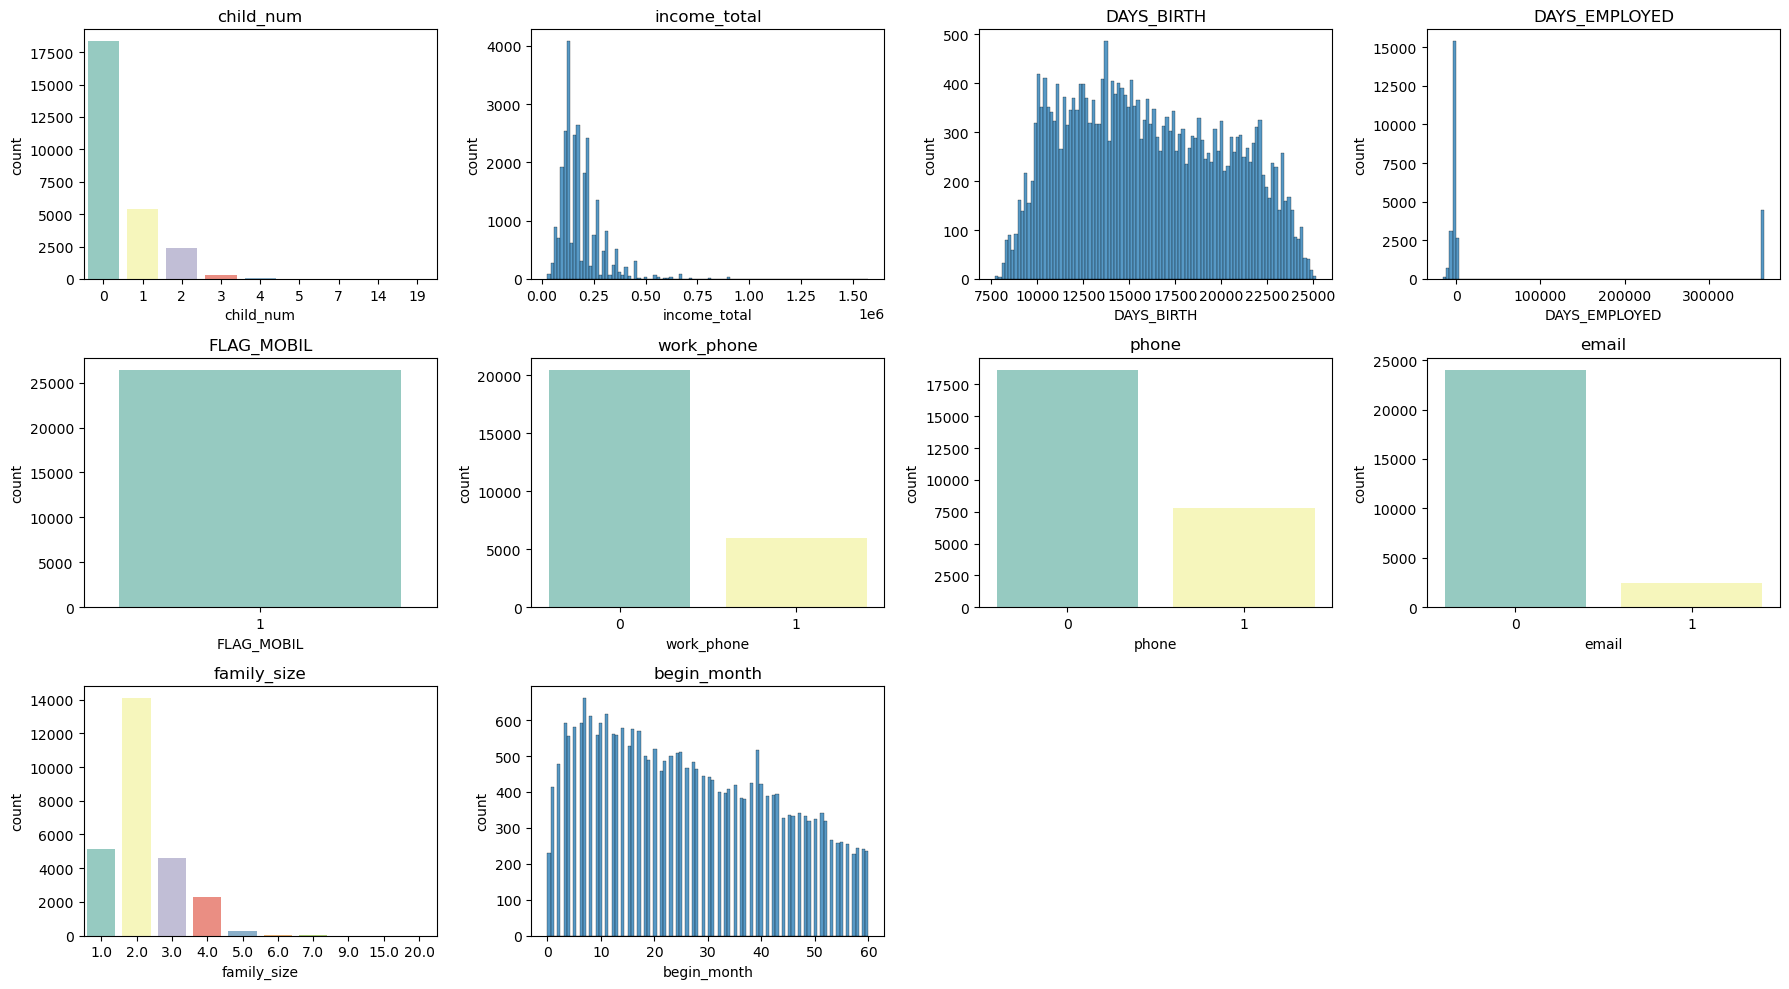

In [98]:
plt.figure(figsize=(18, 10))

# child_num, income_total, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, work_phone, phone, email, family_size, begin_month

# 1. child_num
plt.subplot(3, 4, 1)
plt.title("child_num")
plt.xlabel("child_num")
plt.ylabel("count")
sns.countplot(x='child_num', data=df, palette="Set3")

# 2. income_total
plt.subplot(3, 4, 2)
plt.title("income_total")
plt.xlabel("income_total")
plt.ylabel("count")
sns.histplot(df['income_total'], bins=100, kde=False)

# 3. DAYS_BIRTH
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs()

plt.subplot(3, 4, 3)
plt.title("DAYS_BIRTH")
plt.xlabel("DAYS_BIRTH")
plt.ylabel("count")
sns.histplot(df['DAYS_BIRTH'], bins=100, kde=False)

# 4. DAYS_EMPLOYED
plt.subplot(3, 4, 4)
plt.title("DAYS_EMPLOYED")
plt.xlabel("DAYS_EMPLOYED")
plt.ylabel("count")
sns.histplot(df['DAYS_EMPLOYED'], bins=100, kde=False)

# 5. FLAG_MOBIL
plt.subplot(3, 4, 5)
plt.title("FLAG_MOBIL")
plt.xlabel("FLAG_MOBIL")
plt.ylabel("count")
sns.countplot(x='FLAG_MOBIL', data=df, palette="Set3")

# 6. work_phone
plt.subplot(3, 4, 6)
plt.title("work_phone")
plt.xlabel("work_phone")
plt.ylabel("count")
sns.countplot(x='work_phone', data=df, palette="Set3")

# 7. phone
plt.subplot(3, 4, 7)
plt.title("phone")
plt.xlabel("phone")
plt.ylabel("count")
sns.countplot(x='phone', data=df, palette="Set3")

# 8. email
plt.subplot(3, 4, 8)
plt.title("email")
plt.xlabel("email")
plt.ylabel("count")
sns.countplot(x='email', data=df, palette="Set3")

# 9. family_size
plt.subplot(3, 4, 9)
plt.title("family_size")
plt.xlabel("family_size")
plt.ylabel("count")
sns.countplot(x='family_size', data=df, palette="Set3")

# 10. begin_month
df['begin_month'] = df['begin_month'].abs()

plt.subplot(3, 4, 10)
plt.title("begin_month")
plt.xlabel("begin_month")
plt.ylabel("count")
sns.histplot(df['begin_month'], bins=100, kde=False)

plt.tight_layout()  # 그래프 간 간격 자동 조정
plt.show()

## 전처리 단계

- 중복 제거
- 쓸모없는 column 제거
- 이상치 제거

In [99]:
print(df['child_num'][df['child_num'] > 5])

8462     14
9021     14
10731    19
25313     7
25390    14
25638     7
Name: child_num, dtype: int64


In [100]:
print(df['family_size'][df['family_size'] > 7])

8462     15.0
9021     15.0
10731    20.0
25313     9.0
25390    15.0
25638     9.0
Name: family_size, dtype: float64


In [101]:
# family_size와 child_num의 이상치가 같은 index 확인 후 drop
df.drop(df[df['child_num'] > 5].index, inplace=True)

In [102]:
# family_size와 child_num은 같은 데이터라 봐도 무방하므로 child_num 삭제
df.drop('child_num', axis=1, inplace=True)

In [103]:
# flag_mobil은 모두 1이므로 의미 없음 -> drop
df.drop('FLAG_MOBIL', axis=1, inplace=True)

In [104]:
print("days employed의 값 분포 :\n", df['DAYS_EMPLOYED'].value_counts())

# DAYS_EMPLOYED의 값은 대부분 음수
# 양수인 경우는 이상치로 판단하고 0으로 변경

df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)
df[df['DAYS_EMPLOYED'] > 0].count()  # DAYS_EMPLOYED가 0보다 큰 개수 확인

days employed의 값 분포 :
 DAYS_EMPLOYED
 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-10475        1
-2202         1
-2552         1
-680          1
-4973         1
Name: count, Length: 3469, dtype: int64


gender           0
car              0
reality          0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [105]:
# 날짜 조정

df.DAYS_BIRTH = round(df.DAYS_BIRTH.abs() / 365, 0)  # 나이
df.DAYS_EMPLOYED = round(df.DAYS_EMPLOYED.abs() / 30, 0)  # 근속개월수

In [106]:
# 중복 제거
df = df.drop_duplicates()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24812 entries, 0 to 26456
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         24812 non-null  object 
 1   car            24812 non-null  object 
 2   reality        24812 non-null  object 
 3   income_total   24812 non-null  float64
 4   income_type    24812 non-null  object 
 5   edu_type       24812 non-null  object 
 6   family_type    24812 non-null  object 
 7   house_type     24812 non-null  object 
 8   DAYS_BIRTH     24812 non-null  float64
 9   DAYS_EMPLOYED  24812 non-null  float64
 10  work_phone     24812 non-null  int64  
 11  phone          24812 non-null  int64  
 12  email          24812 non-null  int64  
 13  occyp_type     24812 non-null  object 
 14  family_size    24812 non-null  float64
 15  begin_month    24812 non-null  float64
 16  credit         24812 non-null  float64
dtypes: float64(6), int64(3), object(8)
memory usage: 3.4+ M

# 2. 모델 학습

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 범주형 변수만 선택
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# 범주형 -> 수치형 (예: Label Encoding) 후 -> float 변환
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes.astype(float)

X = df.drop(['credit'], axis=1)
y = df['credit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Fraud ratio in train set:", y_train.mean())
print("Fraud ratio in test set:", y_test.mean())

Train set shape: (19849, 16)
Test set shape: (4963, 16)
Fraud ratio in train set: 1.5142828354073252
Fraud ratio in test set: 1.5142051178722546


In [111]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "16"  

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(10, random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# SMOTE 적용
smote = SMOTE(k_neighbors=3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 스케일링 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 모델별 학습 및 평가
for name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 결과 출력
    print(f"\n {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))


 Logistic Regression
[[   0    0  612]
 [   0    0 1187]
 [   0    0 3164]]
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000       612
         1.0     0.0000    0.0000    0.0000      1187
         2.0     0.6375    1.0000    0.7786      3164

    accuracy                         0.6375      4963
   macro avg     0.2125    0.3333    0.2595      4963
weighted avg     0.4064    0.6375    0.4964      4963


 Random Forest
[[ 135  128  349]
 [  72  500  615]
 [ 182  376 2606]]
              precision    recall  f1-score   support

         0.0     0.3470    0.2206    0.2697       612
         1.0     0.4980    0.4212    0.4564      1187
         2.0     0.7300    0.8236    0.7740      3164

    accuracy                         0.6530      4963
   macro avg     0.5250    0.4885    0.5000      4963
weighted avg     0.6273    0.6530    0.6358      4963


 XGBoost
[[  51   82  479]
 [  14  325  848]
 [  23   84 3057]]
              precision  